<h2>Quantium Virtual Internship - Part II</h2>

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ks_2samp
%matplotlib inline

In [2]:
#Importing the data files into pandas data frames
df=pd.read_csv('QVI_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [3]:
#Converting datatype of the date field to Datetime
df['DATE']=pd.to_datetime(df['DATE'])

#Creating MonthID in yyyymm format
df['MONTH_ID']=df['DATE'].dt.strftime('%Y%m')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_ID
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


<h4>Creating and Identifying Metrics</h4>

In [4]:
#Identifying stores without transactions over all 12 months 
invalid_df=df.groupby(['STORE_NBR'])['MONTH_ID'].nunique()
invalid_df=invalid_df[invalid_df.values!=12].index.to_list()

#Removing stores without transactions over all 12 months from the dataframe
df=df[~df['STORE_NBR'].isin(invalid_df)]
df.head()

del invalid_df

In [5]:
#Creating metrics columns
df['MONTH_SALES'] = df.groupby(['STORE_NBR','MONTH_ID'])['TOT_SALES'].transform('sum')
df['nCUSTOMERS'] = df.groupby(['STORE_NBR','MONTH_ID'])['LYLTY_CARD_NBR'].transform('nunique')
df['nTXN'] = df.groupby(['STORE_NBR','MONTH_ID','LYLTY_CARD_NBR'])['TXN_ID'].transform('nunique')
df['nCHIPS_TXN'] = df.groupby(['STORE_NBR','MONTH_ID','LYLTY_CARD_NBR','TXN_ID'])['PROD_QTY'].transform('sum')
df['AVG_PRICE'] = df['MONTH_SALES']/df.groupby(['STORE_NBR','MONTH_ID'])['PROD_QTY'].transform('sum')

df.sort_values(['STORE_NBR','MONTH_ID'], inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_ID,MONTH_SALES,nCUSTOMERS,nTXN,nCHIPS_TXN,AVG_PRICE
0,1011,2018-07-29,1,12,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2,180,GRNWVES,OLDER SINGLES/COUPLES,Mainstream,201807,206.9,49,1,2,3.337097
1,1027,2018-07-06,1,34,38,Infuzions Mango Chutny Papadums 70g,1,2.4,70,INFUZIONS,OLDER FAMILIES,Premium,201807,206.9,49,1,1,3.337097
2,1042,2018-07-21,1,45,94,Burger Rings 220g,1,2.3,220,BURGER,YOUNG SINGLES/COUPLES,Premium,201807,206.9,49,1,1,3.337097
3,1055,2018-07-08,1,62,43,Smith Crinkle Cut Bolognese 150g,1,2.6,150,SMITHS,RETIREES,Mainstream,201807,206.9,49,1,1,3.337097
4,1057,2018-07-06,1,64,23,Cheezels Cheese 330g,1,5.7,330,CHEEZELS,MIDAGE SINGLES/COUPLES,Mainstream,201807,206.9,49,1,1,3.337097


In [6]:
#Creating a duplicate dataframe and grouping by Store Number and Month ID
data=pd.DataFrame(df.groupby(['STORE_NBR','MONTH_ID'])['TOT_SALES'].sum()).reset_index(level=[0,1])
data['nCUSTOMERS']=df.groupby(['STORE_NBR','MONTH_ID'])['nCUSTOMERS'].mean().values
data['nTXN'] = df.groupby(['STORE_NBR','MONTH_ID'])['nTXN'].mean().values
data['nCHIPS_TXN']= df.groupby(['STORE_NBR','MONTH_ID'])['nCHIPS_TXN'].mean().values
data['AVG_PRICE'] = df.groupby(['STORE_NBR','MONTH_ID'])['AVG_PRICE'].mean().values

data.rename(columns={'TOT_SALES':'MONTH_SALES'},inplace=True)
data

,STORE_NBR,MONTH_ID,MONTH_SALES,nCUSTOMERS,nTXN,nCHIPS_TXN,AVG_PRICE
0,1,201807,206.9,49.0,1.115385,1.192308,3.337097
1,1,201808,176.1,42.0,1.046512,1.255814,3.261111
2,1,201809,278.8,59.0,1.096774,1.209677,3.717333
3,1,201810,188.1,44.0,1.044444,1.288889,3.243103
4,1,201811,192.6,46.0,1.042553,1.212766,3.378947
...,...,...,...,...,...,...,...
3115,272,201902,395.5,45.0,1.166667,1.895833,4.346154
3116,272,201903,442.3,50.0,1.113208,1.905660,4.379208
3117,272,201904,445.1,54.0,1.035714,1.928571,4.239048
3118,272,201905,314.6,34.0,1.300000,1.775000,4.430986


In [7]:
#Defining metrics
base_metrics=['MONTH_SALES','nCUSTOMERS','nTXN','nCHIPS_TXN','AVG_PRICE']

#Filtering the data for pre-trial period and trial period into 2 new dataframes with relevant numeric columns
pretrial_data=data[data['MONTH_ID']<'201902'].copy()
pretrial_data.sort_values(['STORE_NBR','MONTH_ID'], inplace=True)
pretrial_data.drop_duplicates(keep='first',inplace=True)

trial_data=data[(data['MONTH_ID']>='201902') & (data['MONTH_ID']<'201905')].copy()
trial_data.sort_values(['STORE_NBR','MONTH_ID'], inplace=True)
trial_data.drop_duplicates(keep='first',inplace=True)

pretrial_data.head()

,STORE_NBR,MONTH_ID,MONTH_SALES,nCUSTOMERS,nTXN,nCHIPS_TXN,AVG_PRICE
0,1,201807,206.9,49.0,1.115385,1.192308,3.337097
1,1,201808,176.1,42.0,1.046512,1.255814,3.261111
2,1,201809,278.8,59.0,1.096774,1.209677,3.717333
3,1,201810,188.1,44.0,1.044444,1.288889,3.243103
4,1,201811,192.6,46.0,1.042553,1.212766,3.378947


In [8]:
#Setting color palette to match company color scheme
pal=sns.color_palette(palette='gist_gray')

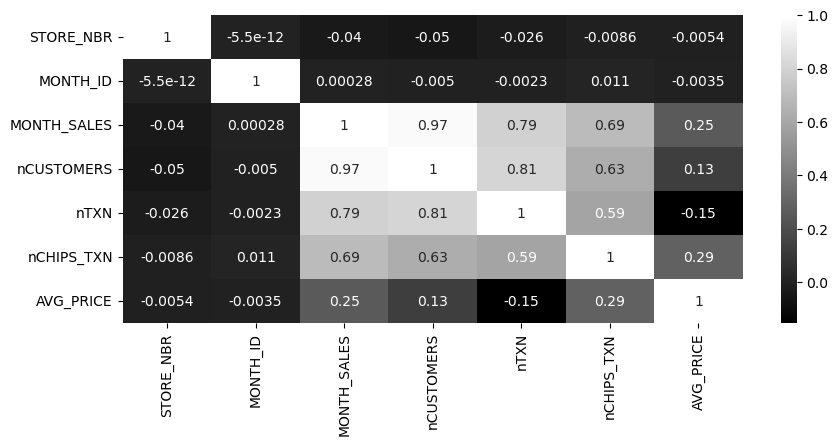

In [9]:
#Plotting Correlation matrix over heatmap to check how the metrics correlate to each other
matrix = pretrial_data.corr()
plt.figure(figsize=(10,4))
sns.heatmap(matrix, cmap='gist_gray', annot = True)
plt.show()

In [10]:
#Trial stores
trial_storenos=[77,86,88]

#Redefining metrics var as Sales and number of customers have highest correlation
metrics=['MONTH_SALES','nCUSTOMERS']

<h5>Observations</h5>
<div>From the correlation table, we see that MONTH_SALES and nCUSTOMERS are the measures which have the highest correlations. Hence, we will select these as our metrics for selecting control stores</div>

<h4>Identifying Control Stores</h4>

In [11]:
#Correlation function
def Correlation(trialstore,metric,input):
    series=input[~input['STORE_NBR'].isin(trial_storenos)]['STORE_NBR'].unique()
    corr_df=pd.DataFrame(columns=['MONTH_ID','TRIAL','CONTROL','CORR'])
    trial=input[input['STORE_NBR']==trialstore][metric].reset_index()
    for i in series:
      temp_df=pd.DataFrame(columns=['MONTH_ID','TRIAL','CONTROL','CORR'])
      ctrl=input[input['STORE_NBR']==i][metric].reset_index()
      temp_df['MONTH_ID']=list(input[input['STORE_NBR']==trialstore]['MONTH_ID'])
      temp_df['TRIAL']=trialstore
      temp_df['CONTROL']=i
      temp_df['CORR']=abs(ctrl.corrwith(trial, axis=1))
      corr_df = pd.concat([corr_df, temp_df])
    return corr_df

In [12]:
#Magnitude function
def MagnitudeDistance(trialstore,metric,input):
    series=input[~input['STORE_NBR'].isin(trial_storenos)]['STORE_NBR'].unique()
    dists=pd.DataFrame()
    trial=input[input['STORE_NBR']==trialstore]
    for i in series:
        temp_df=pd.DataFrame(columns=['MONTH_ID','TRIAL','CONTROL','MAGN'])
        temp_df=abs(trial.reset_index()[metrics] - input[input['STORE_NBR'] == i].reset_index()[metric])
        temp_df['MONTH_ID']=list(input[input['STORE_NBR']==trialstore]['MONTH_ID'])
        temp_df['TRIAL']=trialstore
        temp_df['CONTROL']=i
        dists = pd.concat([dists,temp_df])
    for col in metric:
        dists[col]=1 - ((dists[col] - dists[col].min()) / (dists[col].max() - dists[col].min()))
    dists['MAGN']=dists[metric].mean(axis=1)
    return dists

In [13]:
#Function to create Composite table using Correlation Coefficient and Magnitude
def CompositeTable(trialstore,metric,input):
    corr_table=pd.DataFrame()
    dist_table=pd.DataFrame()
    corr_table = pd.concat([corr_table, Correlation(trialstore,metric,input)])
    dist_table = pd.concat([dist_table, MagnitudeDistance(trialstore,metric,input)])
    composite= pd.merge(dist_table,corr_table, how='inner', on=['TRIAL','CONTROL','MONTH_ID'])
    composite.drop(metric,axis=1,inplace=True)
    composite.reset_index(drop=True,inplace=True)
    return composite

In [14]:
#Function to create a dataframe to compare Composite Score, Correlation Coefficient and Magnitude
def Compare(metric,input):
    compare_df=pd.DataFrame()
    for store in trial_storenos:
        compare_df=pd.concat([compare_df,CompositeTable(store,metric,input)])
    compare_df=compare_df.groupby(['TRIAL','CONTROL']).mean().reset_index()
    compare_df['COMP_SCORE'] =(compare_df['CORR'] + compare_df['MAGN'])/2
    compare_df=compare_df[['TRIAL','CONTROL','MAGN','CORR','COMP_SCORE']]
    return compare_df

In [15]:
comparison=Compare(['MONTH_SALES'],pretrial_data)

#Top 3 Control Stores for each Trial Store based on MONTH_SALES
print('Top 3 Control Stores for each Trial Store based on sum of Sales')
for store in trial_storenos:
    print(comparison[comparison['TRIAL']==store].sort_values('COMP_SCORE',ascending=False).head(3))

Top 3 Control Stores for each Trial Store based on sum of Sales
     TRIAL  CONTROL      MAGN  CORR  COMP_SCORE
218     77      233  0.986477   1.0    0.993238
239     77      255  0.979479   1.0    0.989739
177     77      188  0.977663   1.0    0.988831
     TRIAL  CONTROL      MAGN  CORR  COMP_SCORE
356     86      109  0.966783   1.0    0.983391
401     86      155  0.965876   1.0    0.982938
464     86      222  0.962280   1.0    0.981140
     TRIAL  CONTROL      MAGN  CORR  COMP_SCORE
736     88      237  0.958597   1.0    0.979298
705     88      203  0.953160   1.0    0.976580
551     88       40  0.941165   1.0    0.970582


In [16]:
comparison=Compare(['nCUSTOMERS'],pretrial_data)

#Top 3 Control Stores for each Trial Store based on nCUSTOMERS
print('Top 3 Control Stores for each Trial Store based on number of Customers')
for store in trial_storenos:
    print(comparison[comparison['TRIAL']==store].sort_values('COMP_SCORE',ascending=False).head(3))

Top 3 Control Stores for each Trial Store based on number of Customers
     TRIAL  CONTROL      MAGN  CORR  COMP_SCORE
218     77      233  0.993132   1.0    0.996566
38      77       41  0.976648   1.0    0.988324
101     77      111  0.968407   1.0    0.984203
     TRIAL  CONTROL      MAGN  CORR  COMP_SCORE
401     86      155  0.986772   1.0    0.993386
467     86      225  0.969577   1.0    0.984788
356     86      109  0.969577   1.0    0.984788
     TRIAL  CONTROL      MAGN  CORR  COMP_SCORE
736     88      237  0.987818   1.0    0.993909
705     88      203  0.944629   1.0    0.972315
551     88       40  0.942414   1.0    0.971207


In [17]:
#Top 3 Control Stores for each Trial Store based on MONTH_SALES and nCUSTOMERS
print('Top 3 Control Stores for each Trial Store based on sum of Sales and number of Customers')
for store in trial_storenos:
    a=comparison[comparison['TRIAL'] == store].sort_values('COMP_SCORE',ascending=False).set_index(['TRIAL','CONTROL'])['COMP_SCORE']
    b=comparison[comparison['TRIAL'] == store].sort_values('COMP_SCORE',ascending=False).set_index(['TRIAL','CONTROL'])['COMP_SCORE']
    print((pd.concat([a,b], axis=1).sum(axis=1)/2).sort_values(ascending=False).head(3))

Top 3 Control Stores for each Trial Store based on sum of Sales and number of Customers
TRIAL  CONTROL
77     233        0.996566
       41         0.988324
       111        0.984203
dtype: float64
TRIAL  CONTROL
86     155        0.993386
       109        0.984788
       225        0.984788
dtype: float64
TRIAL  CONTROL
88     237        0.993909
       203        0.972315
       40         0.971207
dtype: float64


In [44]:
#Identifying Best Control Store for each Trial Store
control_storenos=[233,155,237]

control_dict={77:233, 86:155, 88:237}

<h5>Observations</h5>
<div>Based on the best composite score of correlation and magnitude distance, we can see that:
<ul><li>For Trial Store 77 - 233, 41, 111 have the highest scores. We will select Store 233 as the control store for Store 77.</li>
<li>For Trial Store 86 - 155, 109, 225 have the highest scores. We will select Store 155 as the control store for Store 86.</li>
<li>For Trial Store 88 - 237, 203, 40 have the highest scores. We will select Store 237 as the control store for Store 88.</li></div>

<h4>Assessment of Trial</h4>

In [73]:
pretrial_other=pretrial_data[~pretrial_data['STORE_NBR'].isin(control_dict.keys())]
pretrial_other=pretrial_other[~pretrial_other['STORE_NBR'].isin(control_dict.values())]


trial_other=trial_data[~trial_data['STORE_NBR'].isin(control_dict.keys())]
trial_other=trial_other[~trial_other['STORE_NBR'].isin(control_dict.values())]

In [36]:
def lineplots(data,met,key,val,axs):
    plt.figure(figsize=(6,2))
    sns.lineplot(data=data, x='MONTH_ID', y=met, hue='STORE_NBR')
    plt.title('Trial Store '+str(key)+' vs Control Store '+str(val)+' - '+str(met))
    plt.axhline(y=axs[0], linestyle='--', linewidth=1, color='#301934', label="Trial Avg")
    plt.axhline(y=axs[1], linestyle='--', linewidth=1, color='#666666', label="Control Avg")
    plt.xlabel('Time Period')
    plt.ylabel(met)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

In [60]:
def lineplots_comp(data,met,key,val,axs):
    plt.figure(figsize=(6,2))
    sns.lineplot(data=data, x='MONTH_ID', y=met, hue='STORE_NBR')
    sns.lineplot(data=pretrial_other, x='MONTH_ID', y='MONTH_SALES')
    plt.title('Trial Store '+str(key)+' vs Control Store '+str(val)+' - '+str(met))
    plt.axhline(y=axs[0], linestyle='--', linewidth=1, color='#301934', label="Trial Avg")
    plt.axhline(y=axs[1], linestyle='--', linewidth=1, color='#666666', label="Control Avg")
    plt.axhline(y=axs[2], linestyle='--', linewidth=1, color='grey', label="Other Avg")
    plt.xlabel('Time Period')
    plt.ylabel(met)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

In [20]:
def barplots(data,met,key,val,axs):
    plt.figure(figsize=(5,5))
    sns.barplot(data=data, x='MONTH_ID', y=met, hue='STORE_NBR', palette=pal)
    plt.title('Trial Store '+str(key)+' vs Control Store '+str(val)+' - '+str(met))
    plt.axhline(y=axs[0], linestyle='--', linewidth=1, color='#301934', label="Trial Avg")
    plt.axhline(y=axs[1], linestyle='--', linewidth=1, color='#666666', label="Control Avg")
    plt.xlabel('Time Period')
    plt.ylabel(met)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

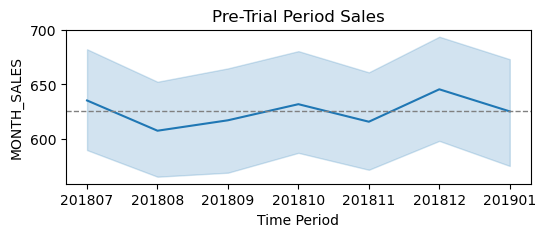

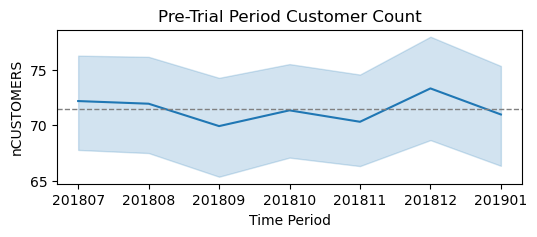

In [67]:

plt.figure(figsize=(6,2))
sns.lineplot(data=pretrial_data, x='MONTH_ID', y='MONTH_SALES')
plt.title('Pre-Trial Period Sales')
plt.axhline(y=pretrial_data['MONTH_SALES'].mean(), linestyle='--', linewidth=1, color='grey')
plt.xlabel('Time Period')
plt.show()

plt.figure(figsize=(6,2))
sns.lineplot(data=pretrial_data, x='MONTH_ID', y='nCUSTOMERS')
plt.title('Pre-Trial Period Customer Count')
plt.axhline(y=pretrial_data['nCUSTOMERS'].mean(), linestyle='--', linewidth=1, color='grey')
plt.xlabel('Time Period')
plt.show()

Difference between Mean MONTH_SALES: -5.600000000000051


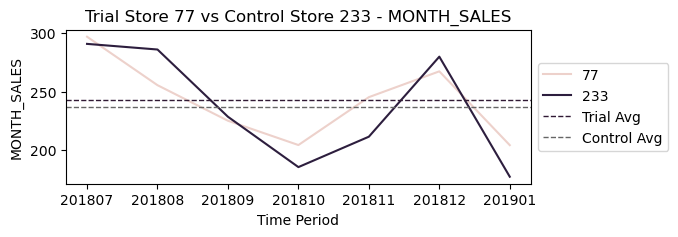

Difference between Mean MONTH_SALES: 26.978571428571627


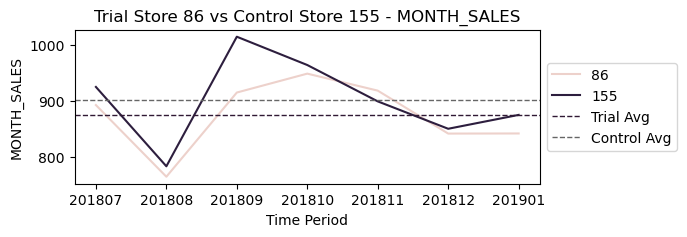

Difference between Mean MONTH_SALES: -2.0857142857144026


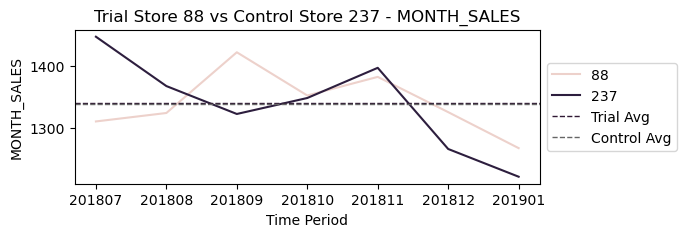

Difference between Mean nCUSTOMERS: -0.1428571428571459


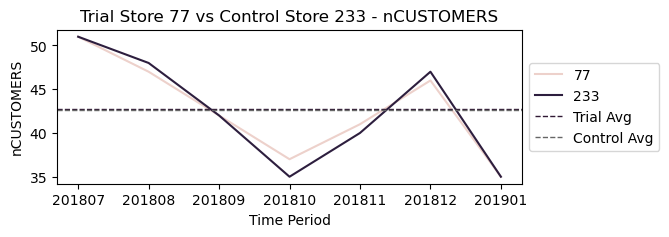

Difference between Mean nCUSTOMERS: 0.0


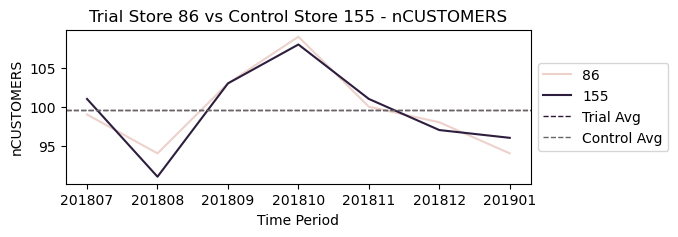

Difference between Mean nCUSTOMERS: 0.7142857142857224


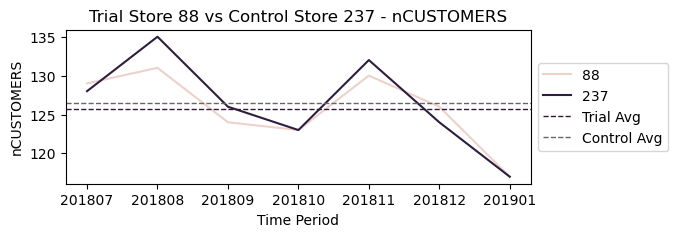

In [62]:
#Lineplots to compare Trial and Control stores during pre-trial period
for metric in metrics:
    for key,val in control_dict.items():
        axs=[]
        axs.append(pretrial_data[pretrial_data['STORE_NBR']==key][metric].mean())
        axs.append(pretrial_data[pretrial_data['STORE_NBR']==val][metric].mean())
        print('Difference between Mean ' + str(metric) +': ' + str(axs[1]-axs[0]))
        plot_df=pretrial_data[pretrial_data['STORE_NBR'].isin([key,val])]
        plot_df=plot_df.groupby(['STORE_NBR','MONTH_ID'])[metric].sum().reset_index()
        lineplots(plot_df,metric,key,val,axs)

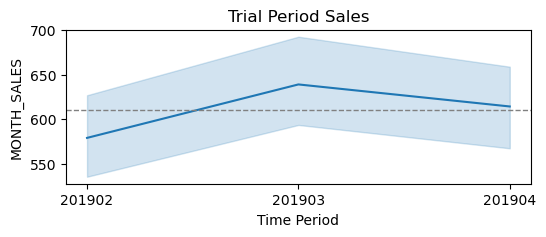

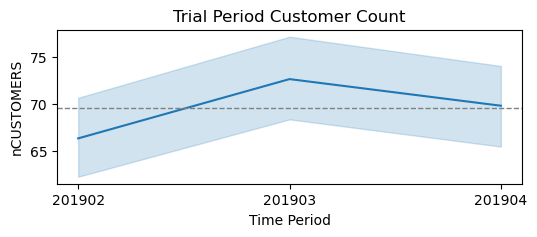

In [82]:

plt.figure(figsize=(6,2))
sns.lineplot(data=trial_data, x='MONTH_ID', y='MONTH_SALES')
plt.title('Trial Period Sales')
plt.axhline(y=trial_data['MONTH_SALES'].mean(), linestyle='--', linewidth=1, color='grey')
plt.xlabel('Time Period')
plt.show()

plt.figure(figsize=(6,2))
sns.lineplot(data=trial_data, x='MONTH_ID', y='nCUSTOMERS')
plt.title('Trial Period Customer Count')
plt.axhline(y=trial_data['nCUSTOMERS'].mean(), linestyle='--', linewidth=1, color='grey')
plt.xlabel('Time Period')
plt.show()

Difference between Mean MONTH_SALES: -58.43333333333331


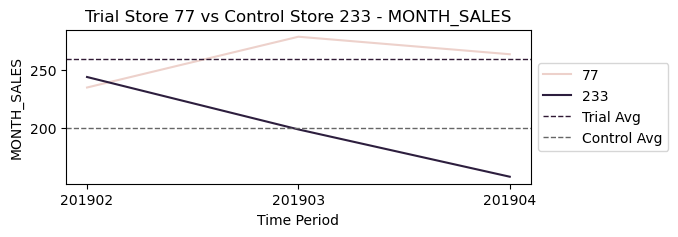

Difference between Mean MONTH_SALES: -82.66666666666674


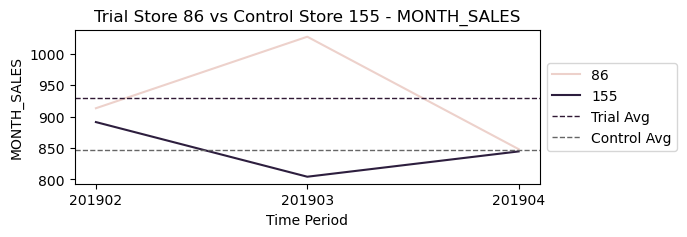

Difference between Mean MONTH_SALES: -156.4000000000001


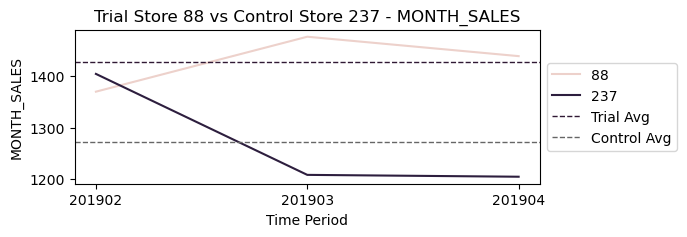

Difference between Mean nCUSTOMERS: -9.0


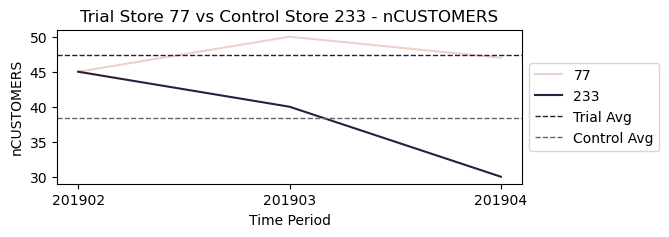

Difference between Mean nCUSTOMERS: -13.0


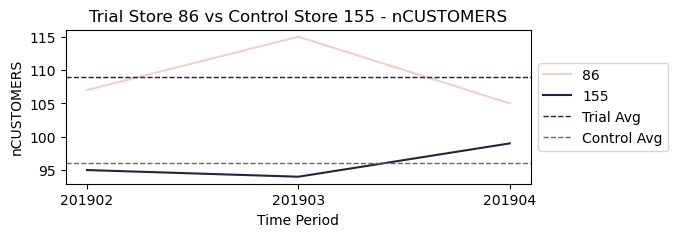

Difference between Mean nCUSTOMERS: -6.999999999999986


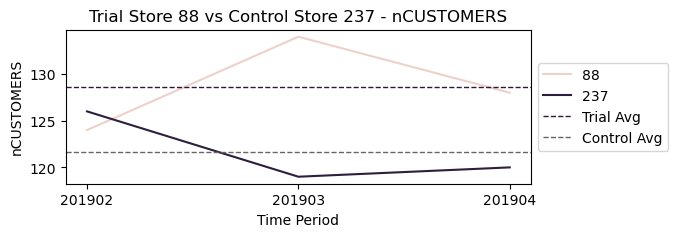

In [38]:
#Barplots to compare Trial and Control stores during trial period
for metric in metrics:
    for key,val in control_dict.items():
        axs=[]
        axs.append(trial_data[trial_data['STORE_NBR']==key][metric].mean())
        axs.append(trial_data[trial_data['STORE_NBR']==val][metric].mean())
        print('Difference between Mean ' + str(metric) +': ' + str(axs[1]-axs[0]))
        plot_df=trial_data[trial_data['STORE_NBR'].isin([key,val])]
        plot_df=plot_df.groupby(['STORE_NBR','MONTH_ID'])[metric].sum().reset_index()
        lineplots(plot_df,metric,key,val,axs)

<h5>Observations</h5>
<div>From observation of the line and bar charts:
<ul><li>Trial Store 77 vs Control Store 233:
<ul><li>During pre-trial period, difference between means of MONTH_SALES was -5.60, and -58.43 during trial period</li>
    <li>During pre-trial period, difference between means of nCUSTOMERS was -0.14, and -9 during trial period</li>
    <li>There is an observable increase in the monthly sales and the number of customers in the Trial Store 77 during the 3 month trial period, as compared against the Control Store 233</li></ul></li>
<li>For Trial Store 86 vs Control Store 155:
<ul><li>During pre-trial period, difference between means of MONTH_SALES was 26.97, and -82.66 during trial period</li>
    <li>During pre-trial period, difference between means of nCUSTOMERS was 0, and -13 during trial period</li>
    <li>There is a significant increase in the monthly sales and the number of customers in the Trial Store 86 during the 3 month trial period, as compared against the Control Store 155</li></ul></li>
<li>For Trial Store 88 vs Control Store 237:
<ul><li>During pre-trial period, difference between means of MONTH_SALES was -2.08, and -156.40 during trial period</li>
    <li>During pre-trial period, difference between means of nCUSTOMERS was 0.71, and -6.99 during trial period</li>
    <li>There is, again, an observable increase in the monthly sales and the number of customers in the Trial Store 88 during the 3 month trial period, as compared against the Control Store 237</li></ul></li></div>

<h5>Conclusion</h5>
<div>There is an increased performance in both MONTH_SALES and nCUSTOMERS in the trial stores 77, 86 and 88 during the trial period, when compared to the respective control stores 233, 155 and 237.</div>